In [1]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
df = pd.read_csv("api_method_desc.csv")

In [3]:
df

,Unnamed: 0,api_method,api_method_desc
0,0,javax.swing.AbstractAction.getValue,Gets the Object associated with the specified ...
1,1,javax.swing.AbstractAction.putValue,Sets the Value associated with the specified key.
2,2,javax.swing.AbstractAction.isEnabled,Returns true if the action is enabled.
3,3,javax.swing.AbstractAction.setEnabled,Sets whether the Action is enabled. The defaul...
4,4,javax.swing.AbstractAction.getKeys,Returns an array of Objects which are keys for...
...,...,...,...
31731,31731,org.omg.PortableServer._ServantActivatorStub.e...,This operation is invoked whenever a servant f...
31732,31732,org.omg.PortableServer._ServantActivatorStub._ids,Description copied from class: ObjectImpl
31733,31733,org.omg.PortableServer._ServantLocatorStub.pre...,This operations is used to get a servant that ...
31734,31734,org.omg.PortableServer._ServantLocatorStub.pos...,This operation is invoked whenener a servant c...


In [4]:
api_method_desc_list = df["api_method_desc"].to_list()

In [5]:
# for s in api_method_desc_list:
#     print(s.split(".")[0])
desc_list = sorted([s.split(". ")[0] for s in api_method_desc_list])

In [6]:
desc_list = [s for s in desc_list if len(s.split(" "))<=14]

In [7]:
desc_list = [s for s in desc_list if "and" not in s]
desc_list = [s for s in desc_list if "which " not in s]
desc_list = [s for s in desc_list if "whether" not in s]
desc_list = [s for s in desc_list if "when" not in s]
desc_list = [s for s in desc_list if "A " not in s]
desc_list = [s for s in desc_list if "such as " not in s]

desc_list = [s for s in desc_list if "Deprecated" not in s]

In [8]:
lint_ = sorted(list(set(desc_list)))

In [9]:
from nltk import ngrams
import collections
trigrams_list=[]
corpus = " ".join(lint_)
# xgrams = ngrams(corpus.split(), 3)
xgrams = ngrams(corpus.split(), 7)
collections.Counter(xgrams).most_common()

[(('Sets', 'the', 'designated', 'parameter', 'to', 'the', 'given'), 42),
 (('color', 'of', 'the', 'current', 'theme', 'Returns', 'the'), 36),
 (('Returns', 'the', 'hash', 'code', 'value', 'for', 'this'), 35),
 (('primitive', 'conversion.', 'Returns', 'the', 'value', 'of', 'this'), 35),
 (('Returns', 'a', 'copy', 'of', 'this', 'LocalDateTime', 'with'), 25),
 (('a', 'copy', 'of', 'this', 'LocalDateTime', 'with', 'the'), 25),
 (('Returns', 'a', 'copy', 'of', 'this', 'OffsetDateTime', 'with'), 25),
 (('a', 'copy', 'of', 'this', 'OffsetDateTime', 'with', 'the'), 25),
 (('Returns', 'a', 'copy', 'of', 'this', 'ZonedDateTime', 'with'), 25),
 (('a', 'copy', 'of', 'this', 'ZonedDateTime', 'with', 'the'), 25),
 (('Gets', 'the', 'value', 'of', 'the', 'specified', 'field'), 24),
 (('after', 'a', 'widening', 'primitive', 'conversion.', 'Returns', 'the'),
  24),
 (('value', 'Updates', 'the', 'designated', 'column', 'with', 'a'), 23),
 (('the', 'value', 'of', 'the', 'specified', 'field', 'from'), 22),

In [17]:

verbs=[]
for line in lint_:
    doc = nlp(line)
    text=""
    pos=""
    tag=""
    dep=""
    
    for idx,token in enumerate(doc):
#         text+=token.text+" "
#         pos+=token.pos_+" "
        text= [token.norm_ for token in doc if token.pos_ in ["VERB"] ]
    if len(text):
        verbs.append(text[0])


In [18]:
import collections
collections.Counter(verbs).most_common()

[('gets', 893),
 ('sets', 654),
 ('specified', 561),
 ('returns', 530),
 ('creates', 379),
 ('adds', 274),
 ('return', 250),
 ('given', 246),
 ('set', 214),
 ('writes', 207),
 ('removes', 204),
 ('copied', 180),
 ('associated', 166),
 ('used', 151),
 ('compares', 148),
 ('designated', 111),
 ('using', 100),
 ('reads', 99),
 ('registered', 92),
 ('retrieves', 90),
 ('added', 89),
 ('selected', 85),
 ('visits', 76),
 ('representing', 72),
 ('converts', 65),
 ('create', 59),
 ('contains', 59),
 ('containing', 55),
 ('determines', 54),
 ('called', 53),
 ('fetches', 53),
 ('will', 46),
 ('provided', 46),
 ('contained', 44),
 ('performs', 41),
 ('represents', 41),
 ('invoked', 40),
 ('allows', 40),
 ('subtracted', 40),
 ('corresponding', 38),
 ('supported', 37),
 ('should', 36),
 ('named', 36),
 ('write', 35),
 ('represented', 34),
 ('makes', 34),
 ('can', 33),
 ('remove', 33),
 ('requested', 32),
 ('updates', 32),
 ('altered', 30),
 ('read', 29),
 ('inserts', 29),
 ('bound', 27),
 ('replace

In [ ]:
len(list(set(desc_list)))

In [10]:
len_ = [len(s.split(" ")) for s in desc_list]

In [11]:
len(len_)

20370

In [12]:
x = pd.Series(len_) 

In [13]:
x.quantile([0.25,0.5,0.75,0.90])

0.25     6.0
0.50     8.0
0.75    10.0
0.90    13.0
dtype: float64

In [14]:
import statistics

statistics.median(len_)

8.0

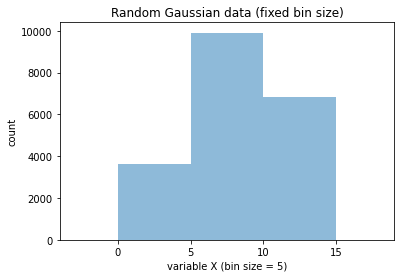

In [15]:
import numpy as np
import random
from matplotlib import pyplot as plt

data = len_ 

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

In [16]:
len(sorted(list(set(api_method_desc_list))))

25536